In [7]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Cargar archivo de datos para el análisis de datos de los dulces en un DataFrame
candy_df = pd.read_csv('candy.csv')
#candy_df


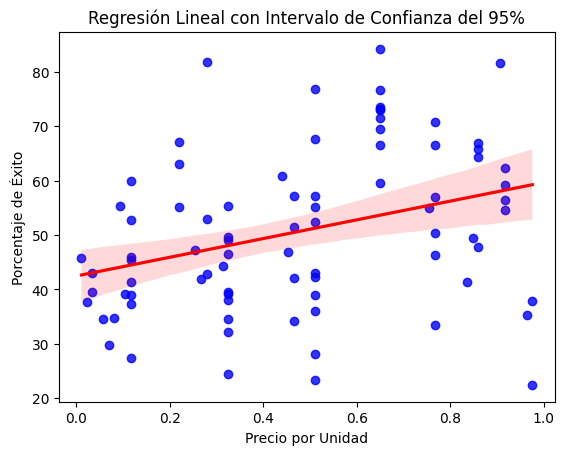

Coeficiente de Correlación: 0.33386
Coeficiente de Determinación: 0.11146
Ecuación de la recta: Y = 17.18681 x + 42.46196
El porcentaje de ganancia o el gusto de los clientes que se podría esperar es de: 58.79


In [8]:
# Seleccionar variables para utilizar en la regresión lineal
# Se seleccionarán las variables de 'precio por unidad' y 'porcentaje de éxito' para identificar si existe alguna relación entre estas dos variables
X = candy_df['pricepercent'].values.reshape(-1,1)
Y = candy_df['winpercent'].values.reshape(-1,1) 

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X, Y)

# Creamos el scatter plot del modelo de regresión lineal con un intervalo de confianza del 95%
sns.regplot(x=X, y=Y, ci=95, line_kws={'color':'red'}, scatter_kws={'color':'blue'})
plt.title("Regresión Lineal con Intervalo de Confianza del 95%")
plt.xlabel('Precio por Unidad')
plt.ylabel('Porcentaje de Éxito')
plt.show()

# Calcular coeficiente de correlación y coeficiente de determinación
print('Coeficiente de Correlación:', round(np.corrcoef(candy_df['pricepercent'], candy_df['winpercent'])[0,1],5))
print('Coeficiente de Determinación:', round(r2_score(candy_df['winpercent'], model.predict(candy_df[['pricepercent']])), 5))

# Ecuación de la recta de regresión lineal
intercepto = model.intercept_
pendiente = model.coef_
print('Ecuación de la recta: Y =', round(pendiente[0][0],5), 'x +', round(intercepto[0],5))

# Generar una predicción con el porcentaje de precio por unidad en un 95%
print('El porcentaje de ganancia o el gusto de los clientes que se podría esperar es de:', round(model.predict([[.95]])[0][0],2))




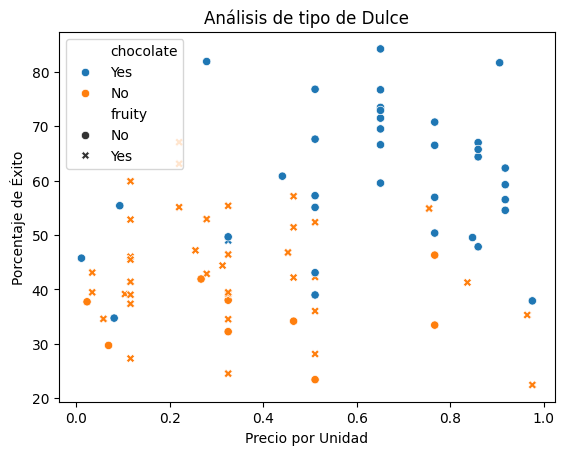

In [9]:
# Analizar si el factor de que sea un dulce de frutas o de chocolate influye en el porcentaje de éxito
sns.scatterplot(x=candy_df['pricepercent'], y=candy_df['winpercent'], style=candy_df['fruity'], hue=candy_df['chocolate'])
plt.title("Análisis de tipo de Dulce")
plt.xlabel('Precio por Unidad')
plt.ylabel('Porcentaje de Éxito')
plt.show()


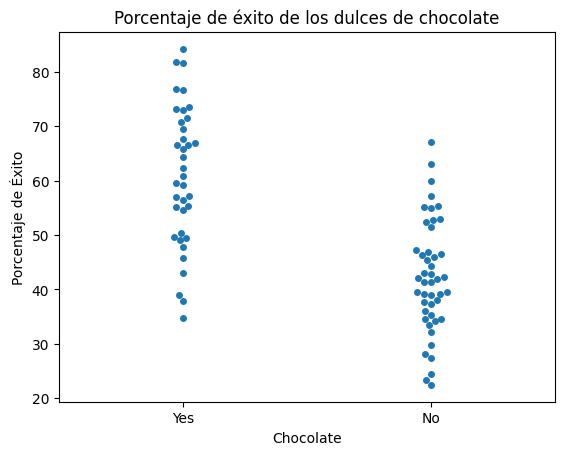

In [10]:
# Análisis de los chocolates
sns.swarmplot(x=candy_df['chocolate'], y=candy_df['winpercent'])
plt.title("Porcentaje de éxito de los dulces de chocolate")
plt.xlabel('Chocolate')
plt.ylabel('Porcentaje de Éxito')
plt.show()